---
# Module 7.2 : Exemple de sélection et d'optimisation de modèles
---

<p>&nbsp;</p>
<div align="center">
    <table><tr>
    <td> <img src= https://drive.google.com/uc?id=1Kb7kRLGTqy7PyEeUDpDqXUY1zuqBrm0O  width="400" /> </td>
    <td> <img src= https://drive.google.com/uc?id=1Qyx5Wv0U3mN408YLXSKrfO-4l7f_Hklg  width="300" /> </td>
    </tr></table>    
    <div>
    <td>  <font size="1.5">(Best et Banting, 1921) Image Source: https://worlddiabetestour.org/fr/diabete/l-insuline-notre-vie/</font> </td>
    </div>
</div>
<p>&nbsp;</p>


Dans ce script en Python, nous allons entraîner un classificateur afin de prédire si un patient 
est diabétique ou non en fonction de variables mesurées à la suite d'une visite médicale (prise 
de pression, de sang, etc.)

Ce type d'analyse a mené à une meilleure compréhension du diabète. C'est un bel exemple de l'utilisation de 
l'apprentissage automatique (*machine learning*) en médecine. Dans ce problème, nous sommes confrontés à des données
disparates (taux de glucose dans le sang, indice de masse corporelle, épaisseur de la peau, etc.) C'est souvent le cas dans la pratique, où l'on mesure un grand nombre de caractéristiques/facteurs/variables et l'on est intéressé à les utiliser afin de prédire, par exemple, si une personne est atteinte ou non du diabète.

La classification sert à prédire une *réponse* $y$, qui est une variable ordinale ou catégorique (c.-à-d. une classe), en fonction de plusieurs variables $x_{i}$

<blockquote> 
$y=f(x_{1}, \cdots, x_{N}, \Theta)$ 
</blockquote> 

où $\Theta$ représente l'ensemble des paramètres de la fonction $f$. On utilise également la notation suivante

<blockquote> 
$\mathbf{X} = [x_{1}, \cdots, x_{N}]$ 
</blockquote> 

afin de représenter le vecteur des entrées.

Il est généralement impossible de modéliser exactement cette fonction dû à la complexité du phénomène étudié. L'apprentissage automatique offre une alternative à la modélisation analytique. Il permet de modéliser un phénomène impliquant un très grand nombre d'interactions entre différentes variables sans avoir à les spécifier explicitement dans un modèle mathématique.  

Nous allons voir comment les outils de l'apprentissage automatique (principalement ceux de la librairie [Scikit-learn](https://scikit-learn.org/stable/index.html)) nous permettent, non seulement de construire des modèles prédictifs, mais aussi de choisir le meilleur parmi eux.

Ce tutoriel fait suite à celui intitulé **Exemple de préparation des données** qui explique comment effectuer le prétraitement des données. Les deux tutoriels utilisent la même base de données [diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). Elle est prétraitée dans le tutoriel précédent et ses données sont analysées dans le présent tutoriel.

### Informations sur la base de données.

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1XNkAdr-Tjz7aK7FGrZljdJ79YmAvCgN9  width="400" />
    <div>
    <font size="1.5">Image Source: Google Image/</font>
    </div>
</div>
<p>&nbsp;</p>


La base de données [diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) contient neuf variables, continues ou ordinales, qui ont été mesurées chez 768 sujets:

<ul>
<li><b>Pregnancies</b>: nombre de grossesses,</li>
<li><b>Glucose</b>: taux de glucose,</li>
<li><b>BloodPressure</b>: pression artérielle,</li>
<li><b>SkinThickness</b>: épaisseur de la peau,</li>
<li><b>Insulin</b>: taux d'insuline,</li>
<li><b>BMI</b>: indice de masse corporelle (IMC), </li>
<li><b>DiabetesPedigreeFunction</b>: facteur de diabète,</li>
<li><b>Age</b>: âge,</li>
<li><b>Outcome</b>: résultat.</li>
</ul>

La dernière, *Outcome*, contient la réponse binaire que l'on veut prédire. Une personne est atteinte 
du diabète lorsque *Outcome*=1. 

### Buts de l'analyse
Notre analyse vise à montrer un exemple complet de projet comprenant les volets suivants:
<ul>
<li>l'entraînement et l'optimisation d'un classificateur,</li>
<li>la sélection d'un classificateur optimal parmi plusieurs,</li>
<li>l'identification des variables mesurées les plus importantes, c.-à-d. celles qui ont le plus grand effet sur la prévalence du diabète.</li>
</ul>

### Étapes de traitement des données
Dans ce qui suit, nous allons effectuer les étapes suivantes de traitement:
<ol>
<li>le balancement des classes,</li>
<li>la normalisation des données,</li>
<li>l'entraînement, l'optimisation et la sélection de modèles,</li>
<li>l'identification des variables les plus importantes.</li>
</ol>


### IMPORTANT: Copie du notebook!

Vous devez faire une copie du notebook dans votre drive avant de l'exécuter, car les modifications dans le notebook original ne seront pas sauvegardées. Vous travaillerez ainsi dans la copie et non dans l'original.


Importation des fichiers à utiliser dans le tutoriel.

In [ ]:
%%bash
git clone https://github.com/Cours-EDUlib/IVADO-AA.git
mv IVADO-AA/module_7/* ./
rm -r IVADO-AA

In [ ]:
%%capture
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Pour la reproductibilité des résultats
np.random.seed(43)

# Author: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

## Partie I: Lecture et séparation des données


#### Lecture des données

Les données originales de la base de données ont été prétraitées dans le tutoriel **Exemple de préparation des données**, dont les résultats ont été sauvegardés dans un DataFrame de la librairie Pandas.

In [ ]:
df = pd.read_csv('diabetes_nettoyee.csv')

Séparation des noms de variables en entrées X et en sorties Y.

In [ ]:
Xcol = df.drop(['Outcome'], axis=1).columns.to_list()
Ycol = 'Outcome'

X = df[Xcol]
y = df[Ycol]

## Partie II: Balancement des classes


<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1o_KGLRxSPNl-zcg66B7QmMvWQoZgThOr  width="200" />
    <div>
    <font size="1.5">Image Source: https://pixabay.com/illustrations/libra-pan-weigh-kitchen-scale-2071314//</font>
    </div>
</div>
<p>&nbsp;</p>


Il arrive souvent dans une base de données que la classe qui nous intéresse le plus soit la plus rare; il 
y a alors un débalancement entre les classes 

Affichons le nombre de sujets de chaque classe.

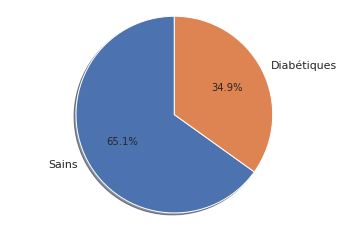

In [ ]:
labels = ['Sains', 'Diabétiques']
sizes = [*y.value_counts()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax = plt.axis('equal')

La classe des sujets sains (*Outcome*=0) comprend environ 65 % des données. Il y a un léger débalancement des données. C'est peu, mais nous allons néanmoins le corriger pour montrer comment le faire.

#### Augmentation de données de la classe défavorisée (sujets diabétiques) 

On utilise la méthode [SMOTE](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html) pour
équilibrer les deux classes.

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

Affichons le nouveau nombre de sujets de chaque classe.

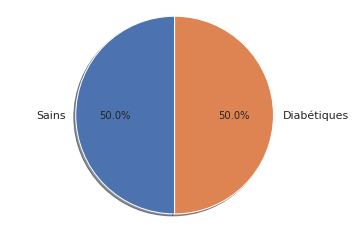

In [ ]:
labels = ['Sains', 'Diabétiques']
sizes = [*y.value_counts()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax = plt.axis('equal')

Il y a autant de sujets dans chaque classe; elles sont maintenant balancées.

## Partie III: Séparation des données en ensembles d'entraînement et de test

On utilise la répartition standard de 80% des données pour l'entraînement et 20% des données pour le test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Partie IV: Normalisation des données.






<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1XDjy_EHwBlDcowJwDQSEE0VduUS7fFNv  width="300" />
    <div>
    <font size="1.5">Image Source: https://www.chegg.com/learn/nutrition/nutrition/body-shape-of-infants</font>
    </div>
</div>
<p>&nbsp;</p>


La dernière étape consiste à normaliser les données; on utilise la méthode [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). La normalisation des données X les met toutes sur un pied d'égalité (sans échelles, unités, etc). L'étape de normalisation peut avoir un grand effet sur les performances des classificateurs. Certains classificateurs y sont sensibles, d'autres non. C'est une bonne habitude de l'utiliser par défaut.

On entraîne la méthode de transformation avec les données d'entraînement et on l'applique ensuite aux données d'entraînement et de test.

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## Partie V: Entraînement d'un classificateur à la fois


<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1O-EGgAOH_7Iy16L3AFNlcdRBMSx3Qvgn  width="350" />
    <div>
    <font size="1.5">Image Source: https://activeforlife.com/how-to-encourage-kids-to-run//</font>
    </div>
</div>
<p>&nbsp;</p>


Les valeurs par défaut des hyperparamètres (HP) d'un classificateur sont rarement optimales. Nous allons voir comment déterminer leurs valeurs optimales à l'intérieur de plages de valeurs possibles. On utilise une méthode d'optimisation sur grille d'hyperparamètres.

Spécification d'un classificateur de type SVM (*Support Vector Machine*).

In [ ]:
cl = SVC()

### Spécification de la grille d'hyperparamètres

Dans cet exemple, deux HP sont variés, soit le paramètre C et le type de SVM.

In [ ]:
params = {
     'C': np.logspace(-1, 1, num=10),
     'kernel' : ('linear', 'rbf')
 }

Entraînement d'un classificateur pour chaque valeur d'HP.

In [ ]:
gs = GridSearchCV(cl, param_grid= params, cv=5, n_jobs=-1, scoring='accuracy')
gs.fit(X_train_s,y_train);

Affichage du meilleur HP.

In [ ]:
gs.best_params_

{'C': 3.593813663804626, 'kernel': 'rbf'}

Performances du meilleur classificateur sur les données d'entraînement et de test

In [ ]:
clf = gs.best_estimator_

y_pred_train = clf.predict(X_train_s)
y_pred_test = clf.predict(X_test_s)

print(
    "Exactitude sur les données d'entraînement: %0.1f %%"
    % (100 * accuracy_score(y_train, y_pred_train))
)

print(
    "Exactitude sur les données de test: %0.1f %%\n\n"
    % (100 * accuracy_score(y_test, y_pred_test))
)

Exactitude sur les données d'entraînement: 92.8 %
Exactitude sur les données de test: 86.5 %




Affichage du rapport de classification selon les classes.

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        93
           1       0.85      0.91      0.88       107

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



La première colonne contient les chiffres 0 et 1; elle identifie les résultats pour les sujets avec (1) et sans (0) diabète.

Observations:
<ul>
<li>Parmi toutes nos prédictions de sujets atteints de diabète, 85 % l'étaient vraiment (précision).</li>
<li>On a détecté 91 % des sujets diabétiques (rappel ou *recall*).</li>
<li>86 % des prédictions (sujets avec ou sans diabète) étaient correctes (exactitude ou *accuracy*).</li>
</ul>

## Partie VI: Entraînement de plusieurs classificateurs à la fois


<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1y0jInA1eAK_rIV3klRUkFAmsSbxonq6f  width="400" />
    <div>
    <font size="1.5">Image Source: https://www.nytimes.com/2016/08/15/sports/olympics/usain-bolt-100-meters-justin-gatlin-results.html//</font>
    </div>
</div>
<p>&nbsp;</p>


Il est plus pratique d'entraîner plusieurs classificateurs en même temps afin de sélectionner le meilleur modèle parmi eux. 

Spécification de plusieurs classificateurs avec quelques valeurs d'HP par défaut. 

In [ ]:
clf1 = SVC()
clf2 = RandomForestClassifier(max_depth=None, min_samples_split=10)
clf3 = GradientBoostingClassifier()
clf4 = XGBClassifier()

### Spécification des grilles d'hyperparamètres

Il y en a une pour chaque classificateur.

In [ ]:
param1 = {}
param1['classifier__C'] = np.logspace(-1, 1, num=10)
param1['classifier__kernel'] = ('linear', 'rbf')
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__n_estimators'] = np.arange(100, 1100, 100)
param2['classifier__max_depth'] = [2, 3, 4, 5]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__n_estimators'] = np.arange(50, 100, 10)
param3['classifier__learning_rate'] = [0.05, 0.1, 0.5, 1.0]
param3['classifier__max_depth'] = [3, 4, 5]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__n_estimators'] = np.arange(50, 100, 10)
param4['classifier__learning_rate'] = [0.05, 0.1, 0.5, 1.0]
param4['classifier__max_depth'] = [3, 4, 5]
param4['classifier'] = [clf4]

pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4]

#### Entraînement de chaque classificateur pour sa grille d'HP

C'est la partie la plus longue à effectuer dans le script. C'est d'autant plus long qu'il y a de classificateurs à comparer entre eux et de combinaisons d'hyperparamètres à tester.

In [ ]:
%%time

gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='accuracy').fit(X_train_s, y_train)

[20:48:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 6.23 s, sys: 282 ms, total: 6.51 s
Wall time: 5min 50s


#### Affichage des paramètres du modèle optimal ainsi que de son score (en validation croisée)

In [ ]:
print('Résultats de la recherche sur grille' )
print("\n Le meilleur modèle pour l'ensemble des paramètres de recherche:\n",gs.best_estimator_)
print("\n Le meilleur score pour l'ensemble des paramètres de recherche: %2.1f %%\n" % (100*gs.best_score_))

Résultats de la recherche sur grille

 Le meilleur modèle pour l'ensemble des paramètres de recherche:
 Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.5,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=60,
                               n_jobs=2, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

 Le meilleur score pour l'en

#### Affichage du rapport de classification selon les classes pour le classificateur optimal 

Une fois que le classificateur optimal est identifié, on l'entraîne à nouveau en utilisant l'ensemble des données, c.-à-d. sans validation croisée. Cela améliore le score. Toutefois, pour la section suivante, nous devons l'entraîner à nouveau.

In [ ]:
clf = XGBClassifier(**gs.best_params_)

clf.fit(X_train_s, y_train);

In [ ]:
y_pred_test = clf.predict(X_test_s)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        93
           1       0.93      0.93      0.93       107

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.93      0.92       200



Observations:
<ul>
<li>Parmi toutes nos prédictions de sujets atteints de diabète, 93 % l'étaient vraiment.</li>
<li>On a détecté 93 % des sujets diabétiques.</li>
<li>93 % des prédictions (sujets avec ou sans diabète) étaient correctes.</li>
</ul>

On a pu passer d'une précision de 85 % à 93 % en optimisant plusieurs modèles à la fois! Il est toujours préférable de comparer plusieurs modèles entre eux, la principale raison étant que la nature des données affecte grandement les performances de chaque type de classificateur.

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1-rUqaiSVfQVZLtRyDKMrPkU5oFyp_r1N  width="300" />
    <div>
    <font size="1.5">Image Source: https://www.mapconsulting.com/great-leadership-is-not-a-popularity-contest//</font>
    </div>
</div>
<p>&nbsp;</p>


## Partie VII: Identification des variables les plus importantes pour diagnostiquer le diabète

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1R10uCHu4QP_bdng61CyIv0VW3YCSnpY8  width="250" />
    <div>
    <font size="1.5">Image Source: https://clipground.com/values-education-clipart.html/</font>
    </div>
</div>
<p>&nbsp;</p>


Voici la partie généralement la plus importante pour quelqu'un intéressé à comprendre les facteurs 
responsables du diabète. Maintenant qu'on a un classificateur, que peut-il nous apprendre sur les variables importantes?

L'importance de chaque variable correspond au nombre de fois qu'elle est utilisée dans des arbres décisionnels pour prendre une décision. Elle prend une valeur entre 0 et 1, où 0 indique qu'elle n'est jamais utilisée, et où 1 indique qu'elle est la seule utilisée parmi toutes. La somme des importances sur l'ensemble des variables vaut 1.

#### Calcul de l'importance de chaque variable dans le modèle

In [ ]:
importances = list(clf.feature_importances_)

# Le nom de chaque variable est associé à son importance.
feature_importances = [(feature, round(importance, 2)) for feature, importance
                       in zip(Xcol, importances)]

# Ordonnancement des valeurs d'importance en ordre décroissant.
feature_importances = sorted(feature_importances, key=lambda x: x[1],
                             reverse=True)

#### Affichage du diagramme d'importance des variables de la base de données.

On veut déterminer lesquelles sont les plus importantes et combien il y en a.


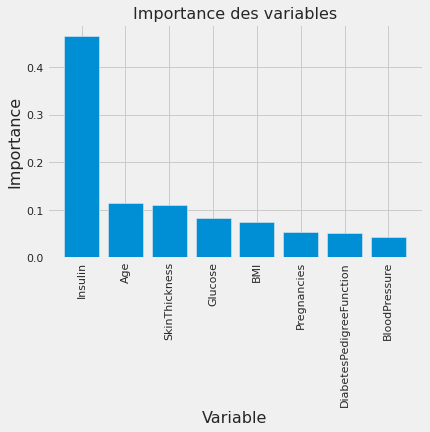

In [ ]:
indices = np.argsort(importances)[::-1]

plt.style.use('fivethirtyeight')

var = list(range(len(importances)))
plt.bar(var, np.array(importances)[indices.astype(int)],
        orientation='vertical')
plt.xticks(var, np.array(Xcol)[indices.astype(int)],
           rotation='vertical')
plt.ylabel('Importance', fontsize=16)
plt.xlabel('Variable', fontsize=16)
plt.title('Importance des variables', fontsize=16);

La variable la plus importante est le taux d'insuline, ce qui n'est pas très surprenant. 

Les deux variables suivantes ont un effet similaire, mais nettement moindre que le taux d'insuline:
<ul>
<li>l'âge,</li>
<li>l'épaisseur de la peau.</li>
</ul>

L'importance des variables restantes diminue lentement par la suite. 

Notez bien que ces résultats ne sont valides que **pour cette base de données**. De plus, l'ordre précis des variables 
peut légèrement changer en fonction du type de prétraitement ou du classificateur utilisés.